# Proyecto: Análisis del mercado inmobiliario de la Ciudad de Buenos Aires

Mentor: Javier Lezama.

javitolez@gmail.com

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal www.Properati.com.ar.

# El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 

#Los atributos

A continuación vamos a describir los atributos que consideramos en esta muestra:
* id: id de la propiedad
* created_on: fecha en la que la propiedad ingresó al sitio
* operation: alquiler (rent) o venta (sell)
* property_type: tipo de propiedad (casa, departamento, ph, etcétera)
* place_with_parent_names: nombre del lugar donde se encuentra la propiedad según el publicador
* lat-lon: coordenadas concatenadas
* lat: latitud
* lon: longitud
* price: precio en la moneda especificada en currency
* currency: divisa en la que está expresada la publicación
* price_aprox_usd: precio aproximado en dólares estadounidenses
* surface_total_in_m2: superficie total (en metros cuadrados)
* surface_covered_in_m2: superficie cubierta (en metros cuadrados)
* price_usd_per_m2: precio por metro cuadrado en dólares (precio dólares / superficie)
* floor: número de piso (si corresponde)
* rooms: cantidad de ambientes
* expenses: expensas (si corresponde)
* barrio: barrio según cartografía oficial
* properati_url: url de la publicación en Properati

Objetivos del practico de análisis y curación:

El objetivo de este practico es trabajar con el mismo dateset trabajado en el practico uno y dejarlo curado, es decir limpiado, sin datos faltantes, para ya poder trabajarlo en los próximos prácticos, con una dateset curado con todas las instancias no nulas, hacer el adecuado análisis de las variables categóricas, etc.

# Manos a la obra

Dado que ya lo trabajamos en el proyecto anterior, en este caso trabajaremos solo con casas (house), departamentos (apartment) y PH (PH).

In [411]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [412]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


In [413]:
df = pd.read_csv('datos_properati.csv', engine='python', parse_dates = ['created_on'])

df.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0


In [414]:
filter=['PH','apartment','house']
df_prop=df[df['property_type'].isin(filter)]
df_prop.shape

(17888, 17)

# Caracteres especiales

Filtrar el dataset en busca de caracteres especiales, si los hay.

Definimos nuestros caractéres válidos:

In [415]:
import string

caracter_valido = string.ascii_letters + string.digits
caracter_valido

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

In [416]:
columnas_df = df_prop.columns
columnas_df

Index(['created_on', 'operation', 'property_type', 'place_with_parent_names',
       'lat-lon', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio', 'comuna'],
      dtype='object')

In [417]:
#df_prop.columns.str.strip(caracter_valido).astype(bool).any()

In [418]:
df_prop.shape

(17888, 17)

***weirdness***
- install package ftfy

In [419]:
import ftfy.badness as bad

In [420]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


df_prop['place_with_parent_names_weirdness'] = df_prop['place_with_parent_names'].apply(weird)
df_prop[df_prop['place_with_parent_names_weirdness'] > 1]

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,place_with_parent_names_weirdness
42,2017-09-01,sell,apartment,|Argentina|Capital Federal|NuÃ±ez|,"-34.5672629609,-58.4318401926",-34.567263,-58.431840,640000.0,200.0,185.0,3200.000000,NaN,4.0,18000.0,https://www.properati.com.ar/1e6hy_venta_departamento_nunez_san-benito-de-palermo_1500_balcon_baulera_suite_lavadero_toilette_vestidor_lujoso_dependencias_garage_aire-acondicionado_filippo-propiedades_9im,PALERMO,14.0,2
46,2017-09-02,sell,apartment,|Argentina|Capital Federal|Las CaÃ±itas|,"-34.5708701,-58.4331449",-34.570870,-58.433145,440000.0,80.0,76.0,5500.000000,NaN,3.0,NaN,https://www.properati.com.ar/1e9gr_venta_departamento_las-canitas_balcon_baulera_suite_gimnasio_lavadero_parrilla_patio_piscina_quincho_sum_sauna_lujoso_garage_amenities_subte-linea-d_l-e-group,PALERMO,14.0,2
47,2017-09-02,sell,apartment,|Argentina|Capital Federal|Las CaÃ±itas|,"-34.5708701,-58.4331449",-34.570870,-58.433145,550000.0,98.0,95.0,5612.244898,NaN,4.0,NaN,https://www.properati.com.ar/1e9i0_venta_departamento_las-canitas_gimnasio_patio_piscina_sauna_lujoso_garage_amenities_subte-linea-d_l-e-group,PALERMO,14.0,2
65,2017-09-04,sell,apartment,|Argentina|Capital Federal|Las CaÃ±itas|,"-34.5711496,-58.4232966",-34.571150,-58.423297,640000.0,260.0,240.0,2461.538462,NaN,5.0,NaN,https://www.properati.com.ar/1eat5_venta_departamento_las-canitas_balcon_suite_lavadero_vestidor_garage_grinspon,PALERMO,14.0,2
73,2017-09-05,sell,apartment,|Argentina|Capital Federal|Las CaÃ±itas|,"-34.5674228,-58.4347627",-34.567423,-58.434763,65000.0,22.0,20.0,2954.545455,NaN,1.0,1300.0,https://www.properati.com.ar/1ebsf_venta_departamento_las-canitas_soldado-de-la-independecia_800_balcon_aire-acondicionado_bg-propiedades,PALERMO,14.0,2
104,2017-09-07,sell,apartment,|Argentina|Capital Federal|Las CaÃ±itas|,"-34.5671607,-58.4331296",-34.567161,-58.433130,443000.0,145.0,124.0,3055.172414,NaN,4.0,NaN,https://www.properati.com.ar/1egut_venta_departamento_las-canitas_balcon_baulera_suite_lavadero_toilette_vista_lujoso_dependencias_garage_doble-circulacion_home54,PALERMO,14.0,2
112,2017-09-08,sell,apartment,|Argentina|Capital Federal|Las CaÃ±itas|,"-34.5742679,-58.4326958",-34.574268,-58.432696,640000.0,177.0,125.0,3615.819209,NaN,5.0,NaN,https://www.properati.com.ar/1ei4y_venta_departamento_las-canitas_balcon_baulera_suite_gimnasio_hidromasaje_lavadero_parrilla_piscina_sum_toilette_vestidor_luminoso_garage_placard_subte-linea-d_toribio-achaval_e6q,PALERMO,14.0,2
134,2017-09-09,sell,apartment,|Argentina|Capital Federal|Las CaÃ±itas|,"-34.5712854,-58.4332185",-34.571285,-58.433219,225000.0,73.0,73.0,3082.191781,NaN,2.0,NaN,https://www.properati.com.ar/1ejw5_venta_departamento_las-canitas_balcon_suite_parrilla_patio_terraza_toilette_garage_subte-linea-d_toribio-achaval_e6o,PALERMO,14.0,2
221,2017-09-15,sell,apartment,|Argentina|Capital Federal|Las CaÃ±itas|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,1.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1etwu_venta_departamento_las-canitas_gimnasio_jardin_lavadero_parrilla_piscina_quincho_sum_vista_sauna_garage_amenities_impecable_mpinus,PALERMO,14.0,2
240,2017-09-16,sell,apartment,|Argentina|Capital Federal|Las CaÃ±itas|,"-34.5670326,-58.4330181",-34.567033,-58.433018,445000.0,144.0,144.0,3090.277778,NaN,5.0,NaN,https://www.properati.com.ar/1ewc9_venta_departamento_las-canitas_balcon_baulera_suite_lavadero_terraza_toilette_luminoso_lujoso_dependencias_garage_doble-circulacion_mpinus,PALERMO,14.0,2


Podemos ver que tenemos caracteres raros, por lo que analizamos el encoding:

In [421]:
import chardet

In [422]:
# look at the first ten thousand bytes to guess the character encoding
with open("datos_properati.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

**Obtenemos ASCII como encoding detectado**

- Intentamos abrir con ASCII

In [423]:
df_ascii = pd.read_csv('datos_properati.csv', engine='python', parse_dates = ['created_on'], encoding="ascii")

df_ascii.head(50)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 4935: ordinal not in range(128)

**Al obtener error, analizamos un caso con caracteres raros**

In [424]:
var = str(df_prop["place_with_parent_names"].loc[42])
var

'|Argentina|Capital Federal|NuÃ±ez|'

In [425]:
type(var)

str

**Asumimos encoding "Windows-1252"**

In [426]:
# encode it to a different encoding, replacing characters that raise errors
after = var.encode("Windows-1252", errors = "replace")

# check the type
type(after)

bytes

In [427]:
print(var)

|Argentina|Capital Federal|NuÃ±ez|


In [428]:
print(after.decode("utf-8"))

|Argentina|Capital Federal|Nuñez|


**Decodificamos con utf-8 y encontramos que se ve correctamente, abrimos el data set nuevamente con ese encoding**

In [429]:
df = pd.read_csv('datos_properati.csv', engine='python', parse_dates = ['created_on'], encoding="utf-8")
df.head(50)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.00,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.00,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.00,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.00,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.00,30.0,30.0,4000.000000,1.0,NaN,NaN,https://www.properati.com.ar/1cw7a_venta_local_palermo_av-santa-fe_5300_garage_subte-linea-d_solucion-inmobiliaria_gx3,PALERMO,14.0
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.00,26.0,NaN,3846.153846,NaN,NaN,NaN,https://www.properati.com.ar/1d36i_venta_local_belgrano_dumont-santos_2400_luminoso_impecable_subte-linea-d_urbana-consultores-inmobiliarios,PALERMO,14.0
7,2017-08-11,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5729833,-58.4388579",-34.572983,-58.438858,390000.00,57.0,57.0,6842.105263,NaN,NaN,NaN,https://www.properati.com.ar/1d3k8_venta_local_palermo_cabildo-av-_200_garage_estrenar_subte-linea-d_triada-propiedades,PALERMO,14.0
8,2017-08-12,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.00,48.0,48.0,2291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1d5sl_venta_local_palermo_zappone-inmobiliaria,PALERMO,14.0
9,2017-08-15,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.00,20.0,20.0,2500.000000,NaN,NaN,NaN,https://www.properati.com.ar/1d86m_venta_local_palermo_santa-fe-av-_4400_subte-linea-d_gaed-inmobiliaria,PALERMO,14.0


In [430]:
filter=['PH','apartment','house']
df_prop=df[df['property_type'].isin(filter)]
df_prop.shape

(17888, 17)

In [431]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


df_prop['place_with_parent_names_weirdness'] = df_prop['place_with_parent_names'].apply(weird)
df_prop[df_prop['place_with_parent_names_weirdness'] > 1]

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,place_with_parent_names_weirdness


In [432]:
df_prop['properati_url_weirdness'] = df_prop['properati_url'].apply(weird)
df_prop[df_prop['properati_url_weirdness'] > 1]

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,place_with_parent_names_weirdness,properati_url_weirdness


In [433]:
df_prop['barrio_weirdness'] = df_prop['barrio'].apply(weird)
df_prop[df_prop['barrio_weirdness'] > 1]

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,place_with_parent_names_weirdness,properati_url_weirdness,barrio_weirdness


**Ahora no se detectan caracteres raros con este encoding, eliminamos las columnas de weirdness**

In [434]:
df_prop=df_prop.drop(['barrio_weirdness','place_with_parent_names_weirdness','properati_url_weirdness'], axis=1)
df_prop.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0


# Chequear si hay datos duplicados


Chequear que no hay datos duplicados, si los hay decidir que hacer con los mismos.

In [435]:
df_prop.drop_duplicates()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,238.0,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,475.0,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,475.0,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0


In [436]:
df_prop.shape

(17888, 17)

# Codificar variables

Para trabajar con los algoritmos de aprendizaje automático, próximos módulos, las variables categóricas estas deben ser codificadas como variables numéricas, no como cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

Codificar el label Barrio con ambas estrategias.

In [437]:
df_prop.barrio.unique()

array(['PALERMO', 'BARRACAS', 'VILLA GRAL. MITRE', 'RECOLETA',
       'BALVANERA', 'MONSERRAT', 'VILLA CRESPO', 'LINIERS', 'SAN NICOLAS',
       'AGRONOMIA', 'VELEZ SARSFIELD', 'NUEZ', 'MATADEROS', 'RETIRO',
       'SAN CRISTOBAL', 'BELGRANO', 'VERSALLES', 'PARQUE CHACABUCO',
       'CABALLITO', 'FLORES', 'PUERTO MADERO', 'VILLA URQUIZA',
       'VILLA DEVOTO', 'CONSTITUCION', 'ALMAGRO', 'PARQUE PATRICIOS',
       'COLEGIALES', 'VILLA SANTA RITA', 'FLORESTA', 'SAAVEDRA',
       'VILLA RIACHUELO', 'BOEDO', 'CHACARITA', 'BOCA', 'MONTE CASTRO',
       'VILLA LURO', 'PARQUE AVELLANEDA', 'VILLA LUGANO', 'PATERNAL',
       'SAN TELMO', 'VILLA REAL', 'VILLA ORTUZAR', 'PARQUE CHAS',
       'NUEVA POMPEYA', 'VILLA DEL PARQUE', 'COGHLAN', 'VILLA PUEYRREDON',
       'VILLA SOLDATI'], dtype=object)

In [438]:
df_barrio = pd.DataFrame({'barrio':df_prop.barrio}, dtype='category')
df_barrio

,barrio
0,PALERMO
18,PALERMO
19,PALERMO
20,PALERMO
22,PALERMO
24,PALERMO
25,PALERMO
26,PALERMO
27,PALERMO
28,PALERMO


In [439]:
dict( enumerate(df_barrio['barrio'].cat.categories) )


{0: 'AGRONOMIA',
 1: 'ALMAGRO',
 2: 'BALVANERA',
 3: 'BARRACAS',
 4: 'BELGRANO',
 5: 'BOCA',
 6: 'BOEDO',
 7: 'CABALLITO',
 8: 'CHACARITA',
 9: 'COGHLAN',
 10: 'COLEGIALES',
 11: 'CONSTITUCION',
 12: 'FLORES',
 13: 'FLORESTA',
 14: 'LINIERS',
 15: 'MATADEROS',
 16: 'MONSERRAT',
 17: 'MONTE CASTRO',
 18: 'NUEVA POMPEYA',
 19: 'NUEZ',
 20: 'PALERMO',
 21: 'PARQUE AVELLANEDA',
 22: 'PARQUE CHACABUCO',
 23: 'PARQUE CHAS',
 24: 'PARQUE PATRICIOS',
 25: 'PATERNAL',
 26: 'PUERTO MADERO',
 27: 'RECOLETA',
 28: 'RETIRO',
 29: 'SAAVEDRA',
 30: 'SAN CRISTOBAL',
 31: 'SAN NICOLAS',
 32: 'SAN TELMO',
 33: 'VELEZ SARSFIELD',
 34: 'VERSALLES',
 35: 'VILLA CRESPO',
 36: 'VILLA DEL PARQUE',
 37: 'VILLA DEVOTO',
 38: 'VILLA GRAL. MITRE',
 39: 'VILLA LUGANO',
 40: 'VILLA LURO',
 41: 'VILLA ORTUZAR',
 42: 'VILLA PUEYRREDON',
 43: 'VILLA REAL',
 44: 'VILLA RIACHUELO',
 45: 'VILLA SANTA RITA',
 46: 'VILLA SOLDATI',
 47: 'VILLA URQUIZA'}

In [440]:
df_prop['barrio_cod']=df_barrio['barrio'].cat.codes
df_prop.head(4)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,barrio_cod
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,20
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,20
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,20
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,20


Ahora hacemos el reemplazo en columnas, de esta forma se crearán tantas columnas como barrios tenga el dataset

In [441]:
df_ej_barrio_dummies = pd.get_dummies(df_prop,columns=['barrio']).head(5)
df_ej_barrio_dummies

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,comuna,barrio_cod,barrio_AGRONOMIA,barrio_ALMAGRO,barrio_BALVANERA,barrio_BARRACAS,barrio_BELGRANO,barrio_BOCA,barrio_BOEDO,barrio_CABALLITO,barrio_CHACARITA,barrio_COGHLAN,barrio_COLEGIALES,barrio_CONSTITUCION,barrio_FLORES,barrio_FLORESTA,barrio_LINIERS,barrio_MATADEROS,barrio_MONSERRAT,barrio_MONTE CASTRO,barrio_NUEVA POMPEYA,barrio_NUEZ,barrio_PALERMO,barrio_PARQUE AVELLANEDA,barrio_PARQUE CHACABUCO,barrio_PARQUE CHAS,barrio_PARQUE PATRICIOS,barrio_PATERNAL,barrio_PUERTO MADERO,barrio_RECOLETA,barrio_RETIRO,barrio_SAAVEDRA,barrio_SAN CRISTOBAL,barrio_SAN NICOLAS,barrio_SAN TELMO,barrio_VELEZ SARSFIELD,barrio_VERSALLES,barrio_VILLA CRESPO,barrio_VILLA DEL PARQUE,barrio_VILLA DEVOTO,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,14.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,14.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


En algunos casos conviene realizar el reemplazo creando columnas, pero esto exige un costo de almacenamiento alto, ya que se crea una columna por categoría. Por eso lo que podriamos hacer es reemplazar de la siguiente forma:

    -barrio: codificacion numerica


A continuación eliminamos las columnas categóricas, dejando las codificadas:

In [442]:
df_prop=df_prop.drop(['barrio'], axis=1)
df_prop.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,comuna,barrio_cod
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,14.0,20
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,14.0,20
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20


# Outliers

Analicemos en primer lugar los valores extremos que puede haber en los precios y en las superficies. Esto nos va a ser útil para luego imputar usando medidas de tendencia central, como el promedio. Recordemos que las medidas de tendencia central pueden ser sensibles a outliers, por lo que la imputación de valores faltantes puede verse afectada.
Una posible pregunta que surge es si conviene primero imputar faltantes y luego remover outliers, o lo contrario. Cuando se imputa se modifica la distribución de los datos. Por eso, las cotas que utilicemos para definir los outliers se verán afectadas por este cambio y modificarán los resultados finales. Entonces comenzaremos quitando outliers.
Vamos a trabajar con price_usd_per_m2. Precios altos pueden corresponderse con grandes superficies, por lo que conviene analizar juntos ambos atributos. Veamos la distribución de los valores y un boxplot para comenzar a identificar los outliers.

In [443]:
df_prop.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,comuna,barrio_cod
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,14.0,20
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,14.0,20
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20


1) Utilizá seaborn para hacer un distplot del precio por metro cuadrado. 
Hacer un drop de los valores NaN de esta columna antes de graficar.

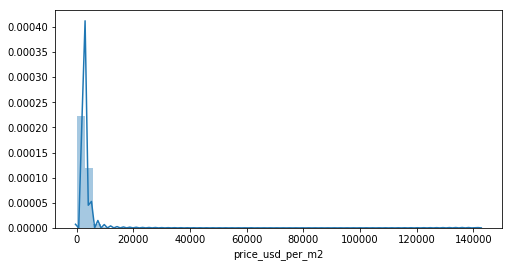

In [444]:
plt.figure(figsize=(8,4))
sns.distplot(df_prop['price_usd_per_m2'].dropna())

2) Hacé un boxplot de la columna price_usd_per_m2

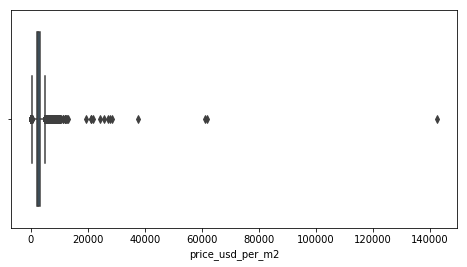

In [445]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_prop['price_usd_per_m2'].dropna())

¿A qué conclusión podemos llegar observando estas figuras? Responder

Podemos ver que existen valores fuera de los bigotes de la caja. Estos puntos en el boxplot nos representan los outliers. Siendo que son muy grandes nos achica la estructura de la caja

Tomamos como ejemplo el caso extremo del outlier con mayor precio por m2 de la muestra. Es muy poco probable que una propiedad con una superficie de 78 m2 tenga un precio por m2 tan alto. Puede que el valor de la superficie sea el incorrecto o el del precio ya que se visualizan todos 1. Por ende solo eliminaremos esa fila.

In [446]:
df_prop[df_prop.price_usd_per_m2 > 100000]

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,comuna,barrio_cod
12965,2018-01-31,sell,apartment,|Argentina|Capital Federal|Flores|,"-34.640267,-58.457566",-34.640267,-58.457566,11111111.0,78.0,68.0,142450.141026,7.0,3.0,NaN,https://www.properati.com.ar/1kbga_venta_departamento_flores_subte-linea-e_subte-premetro_bilardo-negocios-inmobiliarios_3lr,7.0,12


Para confirmar la presencia de outliers vamos a utilizar los percentiles.

3) Describir la columna mostrando sus estadísticos

In [447]:
df_prop['price_usd_per_m2'].describe()

count     15207.000000
mean       2748.896095
std        1863.791284
min           0.958333
25%        2000.000000
50%        2555.555556
75%        3160.919540
max      142450.141026
Name: price_usd_per_m2, dtype: float64

Estamos ante la presencia de valores extremos en ambas puntas de la distribución. Vamos a aplicar la técnica del rango intercuartílico para limpiarlos.

Para obtener el rango tenemos que calcular la diferencia entre el tercer y el primer percentil. Luego en base a esto calcularemos los valores mínimos y máximos para definir qué observaciones serán descartadas.

4) Aplicar la técnica del rango intercuartílico para limpiar el precio por metro cuadrado. El resultado deberá ser un dataframe llamado df_filtered sin los outliers.

In [448]:
p25 = np.percentile(df_prop['price_usd_per_m2'].dropna(), 25)
p75 = np.percentile(df_prop['price_usd_per_m2'].dropna(), 75)

df_iqr_pri_perm2 = p75 - p25
df_iqr_pri_perm2

1160.9195402298851

In [449]:
df_filtered = df_prop[(df_prop.price_usd_per_m2 >= p25) & (df_prop.price_usd_per_m2 <= p75)]

5) Volver a plotear con distplot y boxplot los precios sin los outliers y observá las diferencias con los anteriores ploteo.

Observamos que el distplot y el boxplot sobre la columna price_usd_per_m2 ahora no tienen outliers.

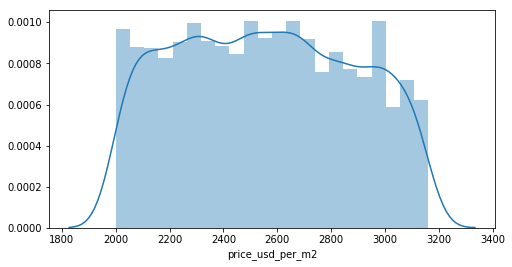

In [450]:
plt.figure(figsize=(8,4))
sns.distplot(df_filtered['price_usd_per_m2'].dropna())

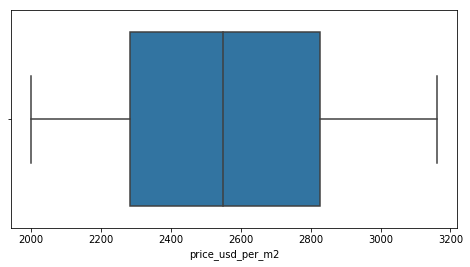

In [451]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered['price_usd_per_m2'])

6) Describir nuevamente la columna mostrando sus estadísticos.

In [452]:
df_filtered['price_usd_per_m2'].describe()

count    7716.000000
mean     2555.506104
std       326.103201
min      2000.000000
25%      2282.051282
50%      2549.019608
75%      2827.446393
max      3160.919540
Name: price_usd_per_m2, dtype: float64

Anteriormente tenía un mínimo menor a 1 usd/m2, esto no tiene sentido si hablamos de una propiedad y se da a entender que es un error en los datos. La std bajó de 1863 a 326 lo cual es una prueba de que el filtro de outliers funcionó correctamente.

Vamos a seguir trabajando con el dataframe filtrado

# Valores Faltantes

A diferencia del proyecto pasado, vamos a intentar imputar los valores faltantes para los atributos que consideramos importantes para el mercado inmobiliario. 

Estos atributos son los que informan superficie (total o cubierta), cantidad de ambientes, precio y precio por metro cuadrado. 
Veamos en primer lugar cuántos valores faltantes tiene cada atributo. Nos interesa verlo como un porcentaje en relación a la cantidad de observaciones. Si un atributo tiene un elevado porcentaje de faltantes, puede ser mejor no considerarlo en el análisis.

In [453]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716 entries, 18 to 18962
Data columns (total 17 columns):
created_on                 7716 non-null datetime64[ns]
operation                  7716 non-null object
property_type              7716 non-null object
place_with_parent_names    7716 non-null object
lat-lon                    7716 non-null object
lat                        7716 non-null float64
lon                        7716 non-null float64
price_aprox_usd            7716 non-null float64
surface_total_in_m2        7716 non-null float64
surface_covered_in_m2      7441 non-null float64
price_usd_per_m2           7716 non-null float64
floor                      1522 non-null float64
rooms                      6297 non-null float64
expenses                   1785 non-null float64
properati_url              7716 non-null object
comuna                     7716 non-null float64
barrio_cod                 7716 non-null int8
dtypes: datetime64[ns](1), float64(10), int8(1), object(5)


Mostrar cual es el porcentaje de valores faltantes para cada columna.

In [454]:
total_entradas = df_filtered.fillna(0).count()
na_por_columna = df_filtered.isna().sum()

porcent_na_col = na_por_columna/total_entradas
porcent_na_col

created_on                 0.000000
operation                  0.000000
property_type              0.000000
place_with_parent_names    0.000000
lat-lon                    0.000000
lat                        0.000000
lon                        0.000000
price_aprox_usd            0.000000
surface_total_in_m2        0.000000
surface_covered_in_m2      0.035640
price_usd_per_m2           0.000000
floor                      0.802748
rooms                      0.183904
expenses                   0.768663
properati_url              0.000000
comuna                     0.000000
barrio_cod                 0.000000
dtype: float64

Analizar y justificar que componente descartarían o no y porque. De quitarlos analizar si hay algún patrón para poder evitar quitarlos.

Podemos ver que los atributos que tienen NANs son:

- surface_covered_in_m2       
- floor
- rooms
- expenses

Dentro de estas variables tenemos que floor y expenses tienen un alto porcentaje (80% y 76% respectivamente) y las dos restantes menos del 20%.

En nuestro caso, estamos enfocados en variables como la ubicación, precio de la propiedad, precio por metro cuadrado, superficie y de como estas variables se relación unas con otras. 

Entonces, como las variablers floor y expenses tienen un alto porcentaje de NANs y no las consideramos importantes para el análisis definido optamos por eliminarlas del dataset de estudio.

En cambio, para el caso de rooms y surface_covered_in_m2 optamos por aplicar un método para completar los NANs con valores que nos sirvan en el estudio

# Imputación de datos

Podemos ver en los resultados que los atributos floor y expenses tienen un elevado porcentaje de faltantes. Una opción sería descartar estas columnas en el análisis. Si elimináramos las observaciones (filas) asociadas a estos, apoximadamente el 80% de los datos, mermando demasiado el conjunto de datos.
Otra opción sería por ejemplo considerar categorías como faltantes o no faltantes o en todo caso analizar si hay algún patrón para poder evitar quitarlos. 
Para avanzar con el proyecto, vamos a quitar esos atributos.

In [455]:
df_filtered_dropna=df_filtered.drop(['floor','expenses'], axis=1)


Analicemos estrategias para imputar los valores faltantes para los atributos rooms, surface_total_in_m2 y surface_covered_in_m2. Decidir qué estrategia tomar y realizar la imputación de los mismos.

Para la variable surface_covered_in_m2 se propone reemplazar los faltantes con el mismo valor que la superficie total

Para la variable rooms se propone lo siguiente:

    Paso 1. Calcular la superficie media de los rooms
    Paso 2. Dividir la superficie cubierta en esta media y redondear para abajo.
    


Una de las limitaciones que presenta los tipo de imputación es que provoca estimaciones sesgadas de la varianza. Esto impacta en los errores estandar y, por ende, en los tests estadísticos.

Este tipo de técnicas resulta útil cuando los valores son completamente al azar. Chequear si ha sucedido esto según la estrategia utilizada en el punto anterior.

### Imputación Faltantes en variable surface_covered_in_m2

Completamos la superficie cubierta faltante con los datos de la superficie total 

In [456]:
df_fill_sup_cub = df_filtered_dropna

df_fill_sup_cub['surface_covered_in_m2']=df_fill_sup_cub['surface_covered_in_m2'].fillna(df_fill_sup_cub['surface_total_in_m2'])
df_fill_sup_cub.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.0,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.0,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.0,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20


In [457]:
df_fill_sup_cub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716 entries, 18 to 18962
Data columns (total 15 columns):
created_on                 7716 non-null datetime64[ns]
operation                  7716 non-null object
property_type              7716 non-null object
place_with_parent_names    7716 non-null object
lat-lon                    7716 non-null object
lat                        7716 non-null float64
lon                        7716 non-null float64
price_aprox_usd            7716 non-null float64
surface_total_in_m2        7716 non-null float64
surface_covered_in_m2      7716 non-null float64
price_usd_per_m2           7716 non-null float64
rooms                      6297 non-null float64
properati_url              7716 non-null object
comuna                     7716 non-null float64
barrio_cod                 7716 non-null int8
dtypes: datetime64[ns](1), float64(8), int8(1), object(5)
memory usage: 911.8+ KB


### Imputación Faltantes en variable rooms

In [493]:
df_prop_rooms_mean = df_fill_sup_cub
df_prop_rooms_mean['surface_by_room']= df_prop_rooms_mean['surface_covered_in_m2']/df_prop_rooms_mean['rooms']

df_prop_rooms_mean.head(5)
#Cálculo de la superficie por habitacion

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,surface_by_room
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,30.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,NaN
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.0,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,55.666667
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.0,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,24.000000
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.0,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20,36.000000


In [460]:
df_prop_rooms_mean=df_prop_rooms_mean.join(df_prop_rooms_mean.groupby('rooms')['surface_by_room'].mean().rename('surface_total_in_m2_mean2'), on='rooms')
df_prop_rooms_mean.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,surface_by_room,surface_total_in_m2_mean2
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,30.000000,29.785351
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,NaN,NaN
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.0,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,55.666667,35.386091
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.0,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,24.000000,23.544755
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.0,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20,36.000000,35.113179


In [461]:
df_prop_rooms_mean['rooms_mean']= df_prop_rooms_mean['surface_covered_in_m2']/(df_prop_rooms_mean['surface_total_in_m2_mean2'].mean())
df_prop_rooms_mean.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,surface_by_room,surface_total_in_m2_mean2,rooms_mean
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,30.000000,29.785351,4.152033
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,NaN,NaN,2.422019
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.0,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,55.666667,35.386091,11.556492
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.0,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,24.000000,23.544755,2.491220
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.0,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20,36.000000,35.113179,1.245610


In [462]:
df_prop_rooms_mean_fill=df_prop_rooms_mean
df_prop_rooms_mean_fill['rooms_mean']=df_prop_rooms_mean_fill['rooms'].fillna(df_prop_rooms_mean_fill['rooms_mean'])
df_prop_rooms_mean_fill.head(4)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,surface_by_room,surface_total_in_m2_mean2,rooms_mean
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,4.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,30.000000,29.785351,4.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,NaN,NaN,2.422019
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,6.0,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,55.666667,35.386091,6.000000
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.0,72.0,72.0,3041.666667,3.0,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,24.000000,23.544755,3.000000


In [463]:
df_prop_rooms_mean_fill['rooms']=df_prop_rooms_mean_fill['rooms'].fillna(df_prop_rooms_mean_fill['rooms_mean'])
df_prop_rooms_mean_fill.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,surface_by_room,surface_total_in_m2_mean2,rooms_mean
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.000000,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,30.000000,29.785351,4.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,2.422019,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,NaN,NaN,2.422019
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.000000,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,55.666667,35.386091,6.000000
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.000000,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,24.000000,23.544755,3.000000
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.000000,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20,36.000000,35.113179,1.000000


Verificamos que no tenemos ningún valor faltante

In [464]:
df_prop_rooms_mean_fill.rooms.isnull().any()

False

In [465]:
df_prop_rooms_mean_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716 entries, 18 to 18962
Data columns (total 18 columns):
created_on                   7716 non-null datetime64[ns]
operation                    7716 non-null object
property_type                7716 non-null object
place_with_parent_names      7716 non-null object
lat-lon                      7716 non-null object
lat                          7716 non-null float64
lon                          7716 non-null float64
price_aprox_usd              7716 non-null float64
surface_total_in_m2          7716 non-null float64
surface_covered_in_m2        7716 non-null float64
price_usd_per_m2             7716 non-null float64
rooms                        7716 non-null float64
properati_url                7716 non-null object
comuna                       7716 non-null float64
barrio_cod                   7716 non-null int8
surface_by_room              6297 non-null float64
surface_total_in_m2_mean2    6297 non-null float64
rooms_mean               

Hacemos drop de las dos columnas auxiliares creadas en los pasos de cálculo anteriores

In [466]:
df_prop_rooms_mean_fill = df_prop_rooms_mean_fill.drop(['surface_by_room','surface_total_in_m2_mean2'], axis=1)
df_prop_rooms_mean_fill.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,rooms_mean
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.000000,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,4.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,2.422019,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,2.422019
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.000000,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,6.000000
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.000000,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,3.000000
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.000000,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20,1.000000


# Variables binarias

### Generar variables binarias para el atributo property_type.

Hay que tener en cuenta en este caso que el atributo es categórico.

Para hacerlo usando scikit-learn, por como vienen dados los valores (en formato string), primero conviene convertirlos en numéricos. Para esto usamos LabelEncoder.

10) Convertí las variables de property_type utilizando LabelEncoder

In [467]:
df_bin = df_prop_rooms_mean_fill

In [468]:
df_bin.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,rooms_mean
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.000000,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,4.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,2.422019,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,2.422019
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.000000,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,6.000000
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.000000,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,3.000000
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.000000,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20,1.000000


In [469]:
from sklearn import preprocessing

In [470]:
df_bin.describe(include=['O'])

,operation,property_type,place_with_parent_names,lat-lon,properati_url
count,7716,7716,7716,7716,7716
unique,1,3,60,5817,7716
top,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.5895459,-58.3973636",https://www.properati.com.ar/1irp0_venta_departamento_villa-crespo_loyola-440_balcon_suite_lavadero_toilette_subte-linea-b_conectar-propiedades
freq,7716,7051,865,66,1


In [472]:
df_prop_bin_label = df_bin
df_prop_bin_one = df_bin

In [473]:
df_prop_bin_label.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,rooms_mean
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.000000,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,4.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,2.422019,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,2.422019
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.000000,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,6.000000
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.000000,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,3.000000
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.000000,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20,1.000000


In [474]:
column='property_type'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(df_prop_bin_label[column])

LabelEncoder()

In [475]:
df_prop_bin_label[column] = le.transform(df_prop_bin_label[column]) 
df_prop_bin_label.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,rooms_mean
18,2017-08-29,sell,1,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.000000,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,4.000000
20,2017-08-29,sell,1,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,2.422019,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,2.422019
22,2017-08-30,sell,2,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.000000,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,6.000000
25,2017-08-30,sell,0,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.000000,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,3.000000
31,2017-08-30,sell,1,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.000000,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20,1.000000


11) Mostrar las clases del LabelEncoder:

In [476]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'PH': 0, 'apartment': 1, 'house': 2}

Luego con OneHotEncoder obtenemos las categorías expresadas como variables binarias. 

12) Aplicar OneHotEncoder sobre las variables categóricas para crear un dataframe categoricals_df

***Tomo como variables categoricas las siguientes:***
- operation
- place_with_parent_names

In [478]:
df_bin.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,rooms_mean
18,2017-08-29,sell,1,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,4.000000,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,14.0,20,4.000000
20,2017-08-29,sell,1,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,2.422019,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,14.0,20,2.422019
22,2017-08-30,sell,2,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,6.000000,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,14.0,20,6.000000
25,2017-08-30,sell,0,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,72.0,3041.666667,3.000000,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,14.0,20,3.000000
31,2017-08-30,sell,1,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,1.000000,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,14.0,20,1.000000


In [479]:
df_bin.groupby('place_with_parent_names').count()

,created_on,operation,property_type,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,rooms_mean
place_with_parent_names,,,,,,,,,,,,,,,
|Argentina|Capital Federal|,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
|Argentina|Capital Federal|Abasto|,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
|Argentina|Capital Federal|Agronomía|,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
|Argentina|Capital Federal|Almagro|,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459
|Argentina|Capital Federal|Balvanera|,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226
|Argentina|Capital Federal|Barracas|,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
|Argentina|Capital Federal|Barrio Norte|,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366
|Argentina|Capital Federal|Belgrano|,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690
|Argentina|Capital Federal|Boca|,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [480]:
df_bin.groupby('operation').count()

,created_on,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,rooms_mean
operation,,,,,,,,,,,,,,,
sell,7716,7716,7716,7716,7716,7716,7716,7716,7716,7716,7716,7716,7716,7716,7716


In [481]:
df_bin['operation'] = pd.Categorical(df_bin['operation'])
df_bin['place_with_parent_names'] = pd.Categorical(df_bin['place_with_parent_names'])

In [482]:
categorical_df_op = pd.get_dummies(df_bin['operation'], prefix = 'operation')
categorical_df_par = pd.get_dummies(df_bin['place_with_parent_names'], prefix = 'place_with_parent_names')

Unir el nuevo dataframe categorical_df con el dataframe original df. Observación, necesitamos que tengan el mismo índice.

In [483]:
df_bin = pd.concat([df_bin, categorical_df_op], axis=1)
df_bin = pd.concat([df_bin, categorical_df_par], axis=1)

In [484]:
df_bin.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,rooms_mean,operation_sell,place_with_parent_names_|Argentina|Capital Federal|,place_with_parent_names_|Argentina|Capital Federal|Abasto|,place_with_parent_names_|Argentina|Capital Federal|Agronomía|,place_with_parent_names_|Argentina|Capital Federal|Almagro|,place_with_parent_names_|Argentina|Capital Federal|Balvanera|,place_with_parent_names_|Argentina|Capital Federal|Barracas|,place_with_parent_names_|Argentina|Capital Federal|Barrio Norte|,place_with_parent_names_|Argentina|Capital Federal|Belgrano|,place_with_parent_names_|Argentina|Capital Federal|Boca|,place_with_parent_names_|Argentina|Capital Federal|Boedo|,place_with_parent_names_|Argentina|Capital Federal|Caballito|,place_with_parent_names_|Argentina|Capital Federal|Catalinas|,place_with_parent_names_|Argentina|Capital Federal|Centro / Microcentro|,place_with_parent_names_|Argentina|Capital Federal|Chacarita|,place_with_parent_names_|Argentina|Capital Federal|Coghlan|,place_with_parent_names_|Argentina|Capital Federal|Colegiales|,place_with_parent_names_|Argentina|Capital Federal|Congreso|,place_with_parent_names_|Argentina|Capital Federal|Constitución|,place_with_parent_names_|Argentina|Capital Federal|Floresta|,place_with_parent_names_|Argentina|Capital Federal|Flores|,place_with_parent_names_|Argentina|Capital Federal|Las Cañitas|,place_with_parent_names_|Argentina|Capital Federal|Liniers|,place_with_parent_names_|Argentina|Capital Federal|Mataderos|,place_with_parent_names_|Argentina|Capital Federal|Monserrat|,place_with_parent_names_|Argentina|Capital Federal|Monte Castro|,place_with_parent_names_|Argentina|Capital Federal|Nuñez|,place_with_parent_names_|Argentina|Capital Federal|Once|,place_with_parent_names_|Argentina|Capital Federal|Palermo|,place_with_parent_names_|Argentina|Capital Federal|Palermo|Palermo Chico|,place_with_parent_names_|Argentina|Capital Federal|Palermo|Palermo Hollywood|,place_with_parent_names_|Argentina|Capital Federal|Palermo|Palermo Soho|,place_with_parent_names_|Argentina|Capital Federal|Palermo|Palermo Viejo|,place_with_parent_names_|Argentina|Capital Federal|Parque Avellaneda|,place_with_parent_names_|Argentina|Capital Federal|Parque Centenario|,place_with_parent_names_|Argentina|Capital Federal|Parque Chacabuco|,place_with_parent_names_|Argentina|Capital Federal|Parque Chas|,place_with_parent_names_|Argentina|Capital Federal|Parque Patricios|,place_with_parent_names_|Argentina|Capital Federal|Paternal|,place_with_parent_names_|Argentina|Capital Federal|Pompeya|,place_with_parent_names_|Argentina|Capital Federal|Puerto Madero|,place_with_parent_names_|Argentina|Capital Federal|Recoleta|,place_with_parent_names_|Argentina|Capital Federal|Retiro|,place_with_parent_names_|Argentina|Capital Federal|Saavedra|,place_with_parent_names_|Argentina|Capital Federal|San Cristobal|,place_with_parent_names_|Argentina|Capital Federal|San Nicolás|,place_with_parent_names_|Argentina|Capital Federal|San Telmo|,place_with_parent_names_|Argentina|Capital Federal|Tribunales|,place_with_parent_names_|Argentina|Capital Federal|Velez Sarsfield|,place_with_parent_names_|Argentina|Capital Federal|Versalles|,place_with_parent_names_|Argentina|Capital Federal|Villa Crespo|,place_with_parent_names_|Argentina|Capital Federal|Villa Devoto|,place_with_parent_names_|Argentina|Capital Federal|Villa General Mitre|,place_with_parent_names_|Argentina|Capital Federal|Villa Lugano|,place_with_parent_names_|Argentina|Capital Federal|Villa Luro|,place_with_parent_names_|Argentina|Capital Federal|Villa Ortuzar|,place_with_parent_names_|Argentina|Capital Federal|Villa Pueyrredón|,place_with_parent_names_|Argentina|Capital Federal|Villa Real|,place_with_parent_names_|Argentina|Capital Federal|Villa Santa Rita|,place_with_parent_names_|Argentina|Capital Federal|Villa Urquiza|,place_with_pare

# Variables Calculadas

### Calcular el precio por metro cuadrado (precio/superficie total). Llamar a este atributo price_m2.

Hay que tener cuidado en esta parte respecto de dividir por cero. Para ello, armemos una función de división que contemple eso.

El hecho de crear una columna nueva y no imputar los faltantes es simplemente una decisión. Cuando veamos modelos predictivos, vamos a poder cuantificar el costo de las decisiones que tomemos en términos de performance del modelo.

Si bien podemos ver que no tenemos valores iguales a cero en la superficie total armamos la función para futuras ocasiones:

In [485]:
cero_control = (df_bin['surface_total_in_m2'] == 0).any()
cero_control

False

Armamos la función para obtener la división entre las columnas de precio y superficie total. Tomamos como criterio para aquellos posibles casos en los que tuvieramos cero en la superficie reemplazar el valor "inf" por el ya existente en el dataset del price_usd_per_m2.

In [486]:
def safe_div(num_serie, den_serie, cero_replace):
    
    res = np.divide(num_serie,den_serie)
    
    res[res==np.inf] = cero_replace
    
    return res

In [487]:
price_serie = df_bin['price_aprox_usd']
surface_serie = df_bin['surface_total_in_m2']

df_bin['price_m2']=safe_div(price_serie,surface_serie,df_bin.price_usd_per_m2)

df_bin.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,comuna,barrio_cod,rooms_mean,operation_sell,place_with_parent_names_|Argentina|Capital Federal|,place_with_parent_names_|Argentina|Capital Federal|Abasto|,place_with_parent_names_|Argentina|Capital Federal|Agronomía|,place_with_parent_names_|Argentina|Capital Federal|Almagro|,place_with_parent_names_|Argentina|Capital Federal|Balvanera|,place_with_parent_names_|Argentina|Capital Federal|Barracas|,place_with_parent_names_|Argentina|Capital Federal|Barrio Norte|,place_with_parent_names_|Argentina|Capital Federal|Belgrano|,place_with_parent_names_|Argentina|Capital Federal|Boca|,place_with_parent_names_|Argentina|Capital Federal|Boedo|,place_with_parent_names_|Argentina|Capital Federal|Caballito|,place_with_parent_names_|Argentina|Capital Federal|Catalinas|,place_with_parent_names_|Argentina|Capital Federal|Centro / Microcentro|,place_with_parent_names_|Argentina|Capital Federal|Chacarita|,place_with_parent_names_|Argentina|Capital Federal|Coghlan|,place_with_parent_names_|Argentina|Capital Federal|Colegiales|,place_with_parent_names_|Argentina|Capital Federal|Congreso|,place_with_parent_names_|Argentina|Capital Federal|Constitución|,place_with_parent_names_|Argentina|Capital Federal|Floresta|,place_with_parent_names_|Argentina|Capital Federal|Flores|,place_with_parent_names_|Argentina|Capital Federal|Las Cañitas|,place_with_parent_names_|Argentina|Capital Federal|Liniers|,place_with_parent_names_|Argentina|Capital Federal|Mataderos|,place_with_parent_names_|Argentina|Capital Federal|Monserrat|,place_with_parent_names_|Argentina|Capital Federal|Monte Castro|,place_with_parent_names_|Argentina|Capital Federal|Nuñez|,place_with_parent_names_|Argentina|Capital Federal|Once|,place_with_parent_names_|Argentina|Capital Federal|Palermo|,place_with_parent_names_|Argentina|Capital Federal|Palermo|Palermo Chico|,place_with_parent_names_|Argentina|Capital Federal|Palermo|Palermo Hollywood|,place_with_parent_names_|Argentina|Capital Federal|Palermo|Palermo Soho|,place_with_parent_names_|Argentina|Capital Federal|Palermo|Palermo Viejo|,place_with_parent_names_|Argentina|Capital Federal|Parque Avellaneda|,place_with_parent_names_|Argentina|Capital Federal|Parque Centenario|,place_with_parent_names_|Argentina|Capital Federal|Parque Chacabuco|,place_with_parent_names_|Argentina|Capital Federal|Parque Chas|,place_with_parent_names_|Argentina|Capital Federal|Parque Patricios|,place_with_parent_names_|Argentina|Capital Federal|Paternal|,place_with_parent_names_|Argentina|Capital Federal|Pompeya|,place_with_parent_names_|Argentina|Capital Federal|Puerto Madero|,place_with_parent_names_|Argentina|Capital Federal|Recoleta|,place_with_parent_names_|Argentina|Capital Federal|Retiro|,place_with_parent_names_|Argentina|Capital Federal|Saavedra|,place_with_parent_names_|Argentina|Capital Federal|San Cristobal|,place_with_parent_names_|Argentina|Capital Federal|San Nicolás|,place_with_parent_names_|Argentina|Capital Federal|San Telmo|,place_with_parent_names_|Argentina|Capital Federal|Tribunales|,place_with_parent_names_|Argentina|Capital Federal|Velez Sarsfield|,place_with_parent_names_|Argentina|Capital Federal|Versalles|,place_with_parent_names_|Argentina|Capital Federal|Villa Crespo|,place_with_parent_names_|Argentina|Capital Federal|Villa Devoto|,place_with_parent_names_|Argentina|Capital Federal|Villa General Mitre|,place_with_parent_names_|Argentina|Capital Federal|Villa Lugano|,place_with_parent_names_|Argentina|Capital Federal|Villa Luro|,place_with_parent_names_|Argentina|Capital Federal|Villa Ortuzar|,place_with_parent_names_|Argentina|Capital Federal|Villa Pueyrredón|,place_with_parent_names_|Argentina|Capital Federal|Villa Real|,place_with_parent_names_|Argentina|Capital Federal|Villa Santa Rita|,place_with_parent_names_|Argentina|Capital Federal|Villa Urquiza|,place_with_pare

### Verificar que ya no quedan atributos con valores faltantes

Verificar que ya no quedan atributos con valores faltantes.

¿Cuál fue el costo de dicho procedimiento? ¿Cuantas observaciones fueron descartadas? ¿Que porcentaje representa? 

Se inicio con el dataset de un total de 18979 entradas y finalizamos con 7716 entradas. Se descartaron más del 50% de las entradas, lo cual es una cantidad significativa. De todas maneras a nuestro criterio, ese número de entradas eliminadas mas allá de que sea significativo, implica que el set de datos original no cumplía con lo requerido por un algoritmo de aprendizaje automático.

In [491]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716 entries, 18 to 18962
Data columns (total 78 columns):
created_on                                                                       7716 non-null datetime64[ns]
operation                                                                        7716 non-null category
property_type                                                                    7716 non-null int32
place_with_parent_names                                                          7716 non-null category
lat-lon                                                                          7716 non-null object
lat                                                                              7716 non-null float64
lon                                                                              7716 non-null float64
price_aprox_usd                                                                  7716 non-null float64
surface_total_in_m2                                          

No identificamos valores faltantes en el dataset

In [492]:
df_bin.isna().any()

created_on                                                                   False
operation                                                                    False
property_type                                                                False
place_with_parent_names                                                      False
lat-lon                                                                      False
lat                                                                          False
lon                                                                          False
price_aprox_usd                                                              False
surface_total_in_m2                                                          False
surface_covered_in_m2                                                        False
price_usd_per_m2                                                             False
rooms                                                                        False
prop

# Informe final

Presentar un informe final con los datos inferidos del dataset utilizando herramientas gráficas y escritas teniendo en cuenta los destinatarios. En este caso colegas de la diplomatura para preparar el informe con un background adecuado al destinatario.